## M161 first question notebook
    - created venv python environment
    - shloud create requirements for resusability
    - data .csv files to large to upload to github will resolve thaht later
## data cleaning 
 1.  check types 
 2. check for null values
 3. check for dublicates

In [24]:
import pandas as pd
file_path = 'bigdata2025classification/train.csv'

def load_and_process_data(file_path):
    # Load data from a CSV file
    dataTrain = pd.read_csv(file_path)

    print("Data loaded successfully.")
    print("First 5 rows of the dataset:")
    print(dataTrain.head())

    print("\nData summary:")
    print(dataTrain.info())

    # Check for missing values in the dataframe
    print("\nMissing values in each column:")
    print(dataTrain.isnull().sum())
    
    return dataTrain

dataTrain = load_and_process_data(file_path)

# check column data types
def check_column_types(dataTrain):
    print("\nColumn data types:")
    print(dataTrain.dtypes)

check_column_types(dataTrain)





Data loaded successfully.
First 5 rows of the dataset:
       Id                                              Title  \
0  227464  Netflix is coming to cable boxes, and Amazon i...   
1  244074  Pharrell, Iranian President React to Tehran 'H...   
2   60707                    Wildlife service seeks comments   
3   27883  Facebook teams up with Storyful to launch 'FB ...   
4  169596           Caesars plans US$880 mln New York casino   

                                             Content          Label  
0   if you subscribe to one of three rinky-dink (...  Entertainment  
1   pharrell, iranian president react to tehran '...  Entertainment  
2   the u.s. fish and wildlife service has reopen...     Technology  
3   the very nature of social media means it is o...     Technology  
4   caesars plans us$880 mln new york casino jul ...       Business  

Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111795 entries, 0 to 111794
Data columns (total 4 columns):
 #   Column   N

In [25]:
# Check for duplicate rows in the dataframe
def check_duplicates(dataTrain):
    duplicate_count = dataTrain.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_count}")
    return duplicate_count

check_duplicates(dataTrain)

# Check for duplicates based only on 'Title' column
def check_title_duplicates(dataTrain):
    if 'Title' in dataTrain.columns:
        dup_count = dataTrain.duplicated(subset=['Title']).sum()
        print(f"\nNumber of duplicate rows based on Title: {dup_count}")
        return dup_count
    else:
        print("'Title' column not found in the dataframe.")
        return None

check_title_duplicates(dataTrain)

# Check for duplicates based only on 'Content' column
def check_content_duplicates(dataTrain):
    if 'Content' in dataTrain.columns:
        dup_count = dataTrain.duplicated(subset=['Content']).sum()
        print(f"\nNumber of duplicate rows based on Content: {dup_count}")
        return dup_count
    else:
        print("'Content' column not found in the dataframe.")
        return None

check_content_duplicates(dataTrain)
# Check for duplicates based on 'Title' and 'Content' columns
def check_title_content_duplicates(dataTrain):
    if 'Title' in dataTrain.columns and 'Content' in dataTrain.columns:
        dup_count = dataTrain.duplicated(subset=['Title', 'Content']).sum()
        print(f"\nNumber of duplicate rows based on Title and Content: {dup_count}")
        return dup_count
    else:
        print("'Title' and/or 'Content' columns not found in the dataframe.")
        return None

check_title_content_duplicates(dataTrain)


Number of duplicate rows: 0

Number of duplicate rows based on Title: 1161

Number of duplicate rows based on Content: 1811

Number of duplicate rows based on Title and Content: 575


np.int64(575)

## Regarding word clouds
- specifically asks  to use **ALL DATA** in each category, so without removing the duplicates it does not make so much sense though.

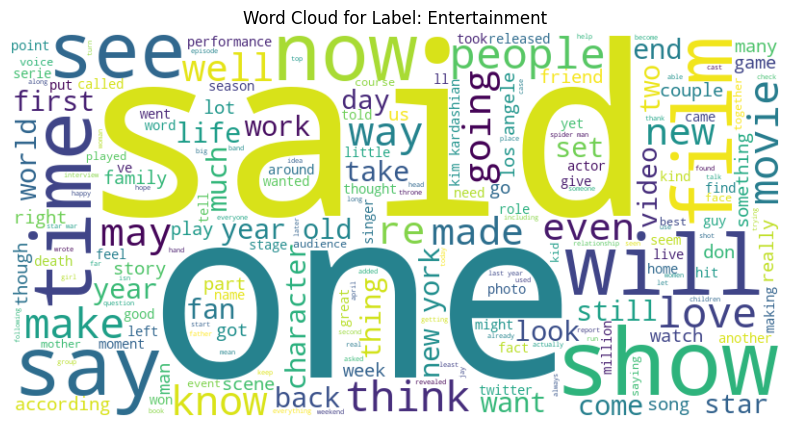

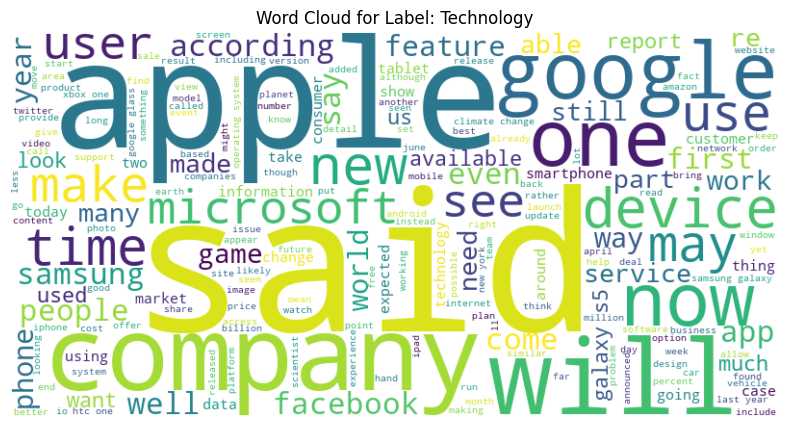

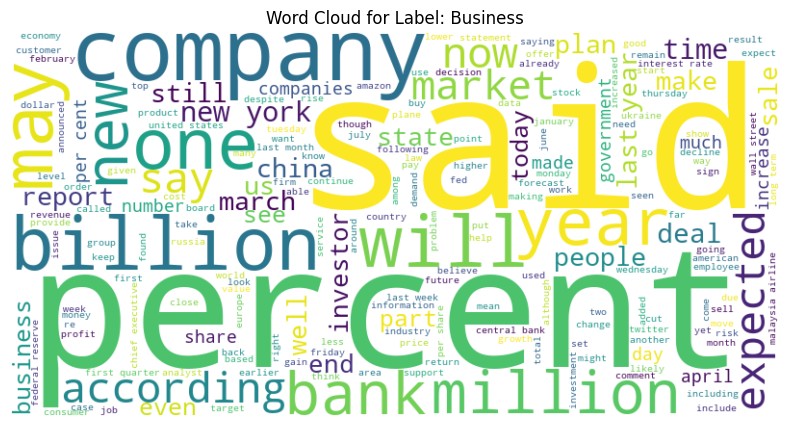

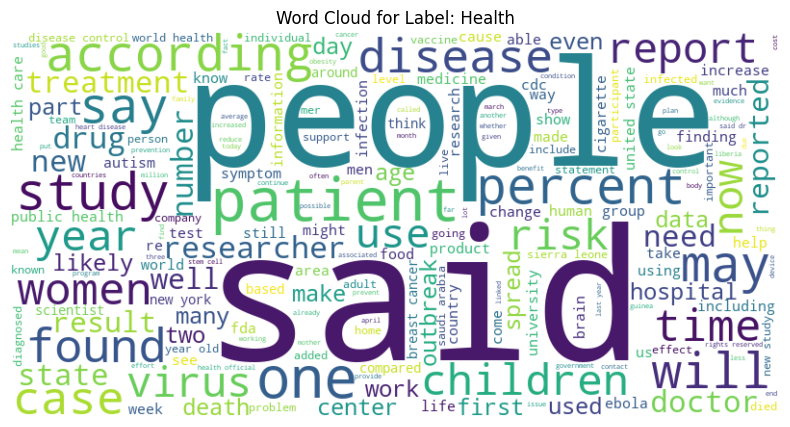

In [26]:
# Generate word clouds for each unique label using the Content column, ignoring single letter words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

if 'Label' in dataTrain.columns and 'Content' in dataTrain.columns:
    unique_labels = dataTrain['Label'].unique()
    for label in unique_labels:
        text = ' '.join(dataTrain[dataTrain['Label'] == label]['Content'].dropna().astype(str))
        # Remove single letter words
        text = ' '.join([word for word in re.findall(r'\b\w+\b', text) if len(word) > 1])
        # # Write the text variable to a txt file for each label for checking purposes
        # with open(f'text_label_{label}.txt', 'w', encoding='utf-8') as f:
        #     f.write(text)
        if text.strip():
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Word Cloud for Label: {label}')
            plt.show()
        else:
            print(f"No content available for label: {label}")
else:
    print("'Label' and/or 'Content' columns not found in the dataframe.")

In [27]:
# Remove duplicates based on 'Title' and 'Content' columns, keeping the first occurrence
dataTrain = dataTrain.drop_duplicates(subset=['Title', 'Content'], keep='first')
print("\nDuplicates based on Title and Content removed. Data shape:", dataTrain.shape)


# Reset the index after removing duplicates
dataTrain = dataTrain.reset_index(drop=True)
print("\nIndex reset. Data shape:", dataTrain.shape)
dataTrain.info()


Duplicates based on Title and Content removed. Data shape: (111220, 4)

Index reset. Data shape: (111220, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111220 entries, 0 to 111219
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Id       111220 non-null  int64 
 1   Title    111220 non-null  object
 2   Content  111220 non-null  object
 3   Label    111220 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


In [31]:
import re
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download required NLTK data if not already present
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def clean_text(text):
    # Expand contractions
    text = contractions.fix(text)
    # Convert to lowercase
    text = text.lower()
    # Remove special characters (keep only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize
    words = text.split()
    # Remove stopwords, lemmatize, and stem
    words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words if word not in stop_words]
    text = ' '.join(words)
    return text

for col in ['Title', 'Content']:
    dataTrain[col] = dataTrain[col].astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\odys_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\odys_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\odys_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [32]:
print(dataTrain.head())

       Id                                             Title  \
0  227464     netflix come cabl box amazon groceri overlord   
1  244074  pharrel iranian presid react tehran happi arrest   
2   60707                       wildlif servic seek comment   
3   27883             facebook team story launch fb newswir   
4  169596                 caesar plan u mln new york casino   

                                             Content          Label  
0  subscrib one three rinkydink compar speak cabl...  Entertainment  
1  pharrel iranian presid react tehran happi arre...  Entertainment  
2  you fish wildlif servic reopen comment period ...     Technology  
3  natur social medium mean often sourc real time...     Technology  
4  caesar plan u mln new york casino jul newsdesk...       Business  


Label
Entertainment    44527
Technology       29998
Business         24742
Health           11953
Name: count, dtype: int64

Number of unique Labels: 4


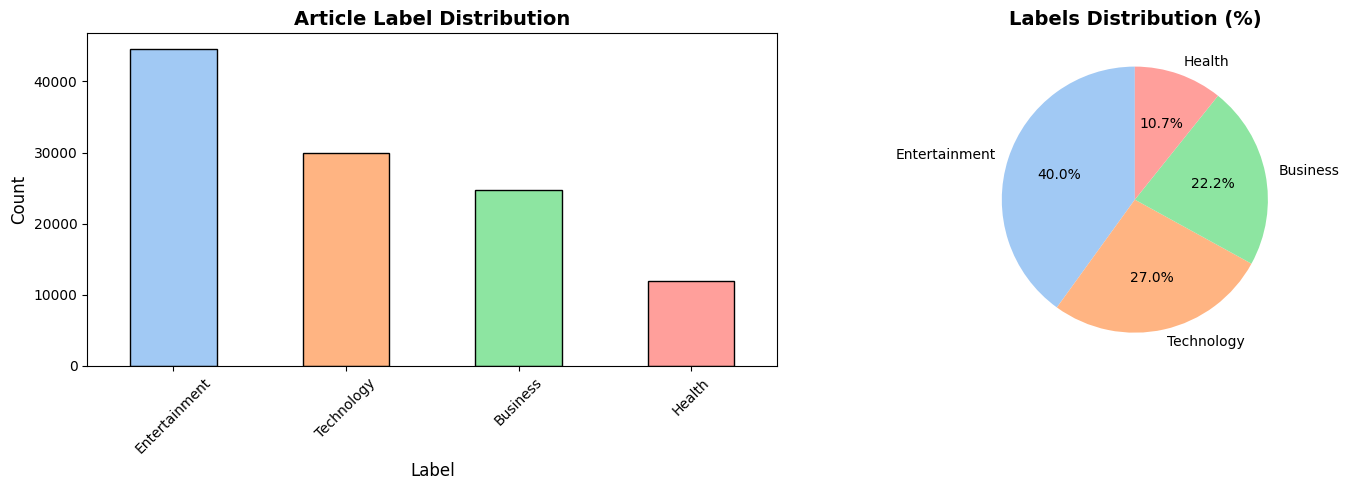

In [33]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
category_counts = dataTrain['Label'].value_counts()

print(category_counts)
print(f"\nNumber of unique Labels: {dataTrain['Label'].nunique()}")

# Get a color palette with as many colors as there are categories
palette = sns.color_palette('pastel', n_colors=len(category_counts))

# Bar plot with consistent colors
category_counts.plot(kind='bar', ax=axes[0], color=palette, edgecolor='black')
axes[0].set_title('Article Label Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Pie chart with the same colors
axes[1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
            startangle=90, colors=palette)
axes[1].set_title('Labels Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Bellow sentence_cound always return 1 because i have removed stopword in cell 5 above, can move the cell above to get a real metric 

In [34]:
import numpy as np
dataTrain['text_length'] = dataTrain['Content'].apply(len)
dataTrain['word_count'] = dataTrain['Content'].apply(lambda x: len(str(x).split()))
dataTrain['sentence_count'] = dataTrain['Content'].apply(lambda x: len(str(x).split('.')))
dataTrain['avg_word_length'] = dataTrain['Content'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

print("\n--- Content Statistics ---")
print(dataTrain[['text_length', 'word_count', 'sentence_count', 'avg_word_length']].describe())


--- Content Statistics ---
         text_length     word_count  sentence_count  avg_word_length
count  111220.000000  111220.000000        111220.0    111220.000000
mean     1537.843077     238.479653             1.0         5.441525
std      1257.959497     194.903852             0.0         0.427400
min         7.000000       1.000000             1.0         2.237288
25%       783.000000     123.000000             1.0         5.230415
50%      1225.000000     190.000000             1.0         5.437186
75%      1908.000000     295.000000             1.0         5.639706
max     43377.000000    6692.000000             1.0        88.133333


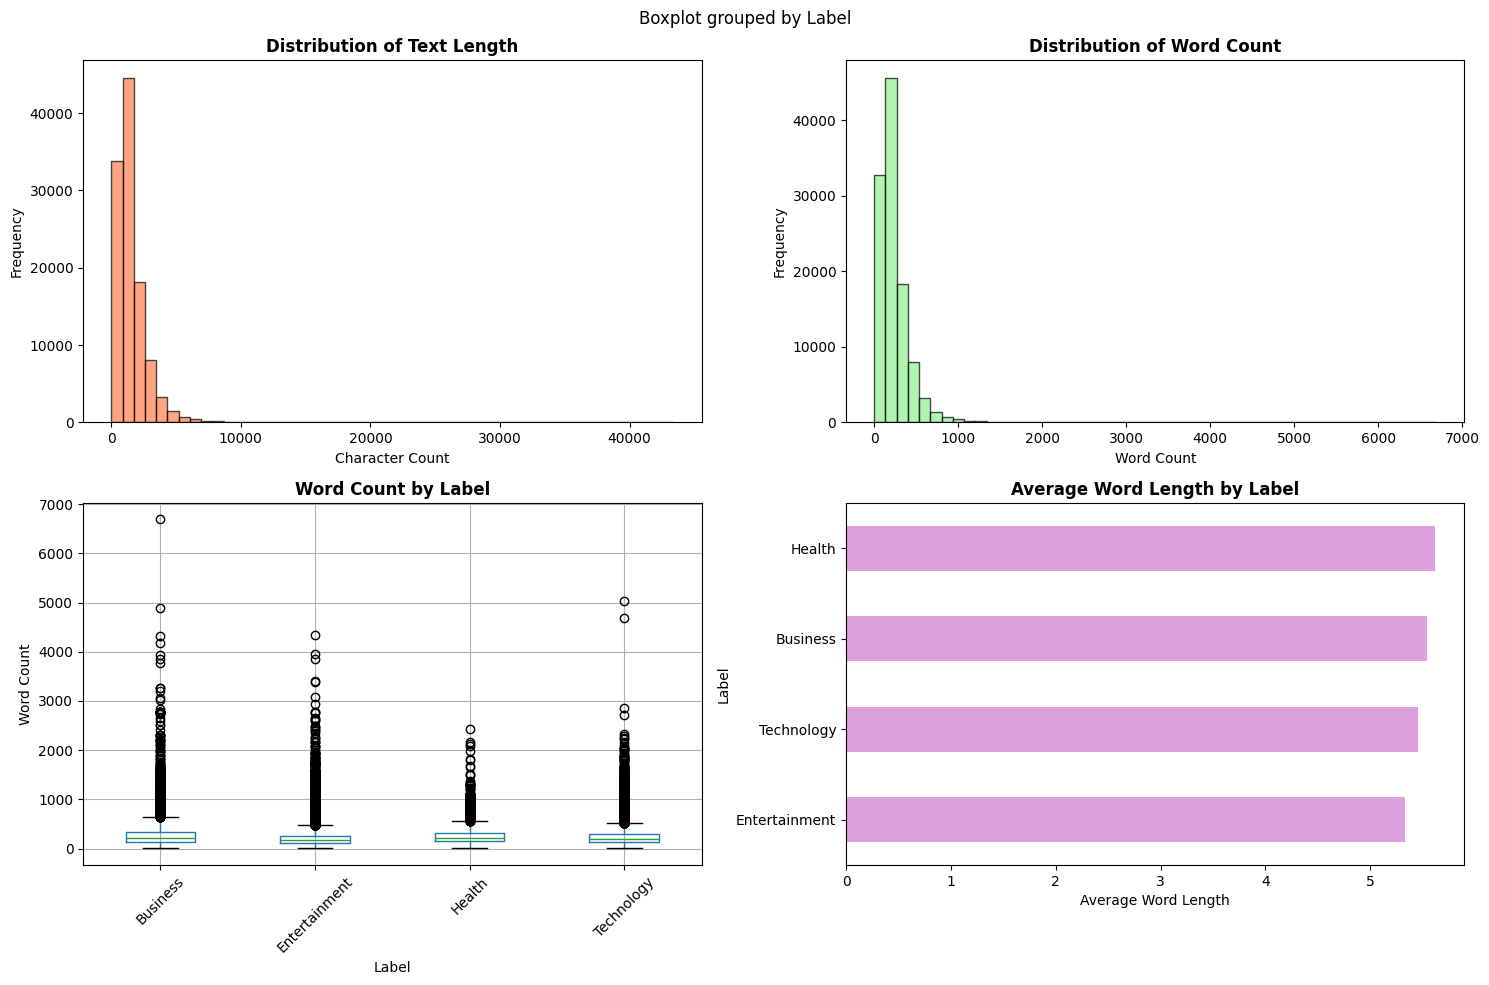

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Text length distribution
axes[0, 0].hist(dataTrain['text_length'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Text Length', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')

# Word count distribution
axes[0, 1].hist(dataTrain['word_count'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Word Count', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')

# Box plot: Word count by category
dataTrain.boxplot(column='word_count', by='Label', ax=axes[1, 0])
axes[1, 0].set_title('Word Count by Label', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Label')
axes[1, 0].set_ylabel('Word Count')
plt.sca(axes[1, 0])
plt.xticks(rotation=45)
# Avg word length by category
category_avg_word_length = dataTrain.groupby('Label')['avg_word_length'].mean().sort_values()
category_avg_word_length.plot(kind='barh', ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Average Word Length by Label', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Average Word Length')
axes[1, 1].set_ylabel('Label')

plt.tight_layout()
plt.show()

## Starting future extraction (converting text to numbers for ML algorythms to run)
## we should use Bag of words based on project requirements 

In [36]:
# Feature extraction using Bag of Words for 'Content' column
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer (Bag of Words)
bow_vectorizer = CountVectorizer()

# Fit and transform the 'Content' column
dataTrain_bow = bow_vectorizer.fit_transform(dataTrain['Content'])

# Show shape and a sample
print('Bag of Words matrix shape:', dataTrain_bow.shape)
print("dataTrain_bow sample (first 5 rows):", dataTrain_bow[:10].toarray())
print('Feature names (first 20):', bow_vectorizer.get_feature_names_out()[:20])

Bag of Words matrix shape: (111220, 451655)
dataTrain_bow sample (first 5 rows): [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature names (first 20): ['aa' 'aaa' 'aaaa' 'aaaaaaaall' 'aaaaaaand' 'aaaaaahahaahahahaahahahaaha'
 'aaaaaahahahahahahaah' 'aaaaaand' 'aaaaah' 'aaaaalmost' 'aaaaand' 'aaaai'
 'aaaaiorg' 'aaaall' 'aaaalll' 'aaaand' 'aaaapprov' 'aaaar' 'aaaarizonaat'
 'aaacom']


## need to clean the above reparing letter words

In [37]:
# Dimensionality reduction using Truncated SVD (LSA) for text data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Example: Use the 'Content' column for text features and 'Label' as target
if 'Content' in dataTrain.columns and 'Label' in dataTrain.columns:
    # Convert text to TF-IDF features
    vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
    X_tfidf = vectorizer.fit_transform(dataTrain['Content'].fillna(''))
    
    # Apply Truncated SVD
    svd = TruncatedSVD(n_components=100, random_state=42)
    X_reduced = svd.fit_transform(X_tfidf)
    
    print('Original TF-IDF shape:', X_tfidf.shape)
    print('Reduced shape after Truncated SVD:', X_reduced.shape)
else:
    print("'Content' and/or 'Label' columns not found in the dataframe.")

Original TF-IDF shape: (111220, 10000)
Reduced shape after Truncated SVD: (111220, 100)
